<h1><center>Natural Language Processing</center></h1>

<h3><center>NLP 12</center></h3>

![hM0xGrmJw](https://miro.medium.com/max/720/1*PGB0w1JZslqA-hM0xGrmJw.gif)

# Topics
1.	Introduction to Natural Language Processing
2.	Why learn NLP?
3.	Let's start playing with Python!
4.	Text Wrangling and Cleansing
 - Sentence splitter
 - Tokenization
 - Stemming         
 - Lemmatization    
 - Stop word removal
 - Diving into NLTK
5.	Vectorizing with Python
 - Count Vectorizer 
 - TF-IDF Vectorizer
6.	Modelling with Python 
 - Classification 
 - Clustering <---------------------------------------------------- **This is where we are**
 - Sentiment Analysis 


# Reading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/ecommerceDataset.csv',header=None, names=['Category','Text'])

In [3]:
df.head()

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


# Data too big, taking subset

In [4]:
df_mini = df.iloc[0:1000, :]

In [5]:
df_mini

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
995,Household,WICKER HUB Wicker Outdoor Patio Sofa Set (Whit...
996,Household,Invezo Impression Portable Foldable Reusable G...
997,Household,"AmazonBasics Pop-up Canopy Tent - 10 x 10 ft, ..."
998,Household,Coleman Instant Canopy Sunwall - Accessory Onl...


# K-Means Clustering

K-means is a centroid-based algorithm or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. 
- In K-Means, each cluster is associated with a centroid.

### How to Apply K-Means Clustering Algorithm?
Let’s now take an example to understand how K-Means actually works:

![](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-21-43.png)

We have these 8 points, and we want to apply k-means to create clusters for these points. Here’s how we can do it.

### Step 1: Choose the number of clusters k
- The first step in k-means is to pick the number of clusters, k.

### Step 2: Select k random points from the data as centroids
- Next, we randomly select the centroid for each cluster. 
- Let’s say we want to have 2 clusters, so k is equal to 2 here. 
- We then randomly select the centroid:

![](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-23-55.png)

Here, the red and green circles represent the centroid for these clusters.

### Step 3: Assign all the points to the closest cluster centroid
- Once we have initialized the centroids, we assign each point to the closest cluster centroid:

![](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-24-35.png)

- Here you can see that the points closer to the red point are assigned to the red cluster, 
- whereas the points closer to the green point are assigned to the green cluster.

### Step 4: Recompute the centroids of newly formed clusters
- Now, once we have assigned all of the points to either cluster, 
- the next step is to compute the centroids of newly formed clusters:

![](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-26-59.png)

Here, the red and green crosses are the new centroids.

### Step 5: Repeat steps 3 and 4
- We then repeat steps 3 and 4:

![](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-09-12-28-14.png)

The step of computing the centroid and assigning all the points to the cluster based on their distance from the centroid is a single iteration. But wait – when should we stop this process? It can’t run till eternity, right?

### Stopping Criteria for K-Means Clustering
There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations is reached


In [64]:
df_iris = pd.read_csv('datasets/Iris.csv')

In [65]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
df_iris_sepal = df_iris[['sepal_length','sepal_width','species']]

In [67]:
df_iris_sepal

,sepal_length,sepal_width,species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

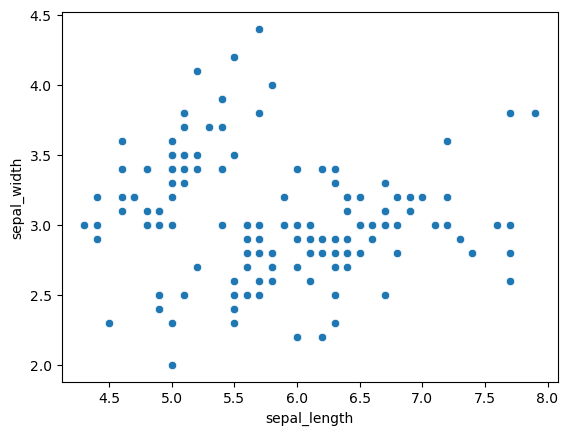

In [68]:
import seaborn as sns

sns.scatterplot(data=df_iris_sepal, x="sepal_length", y="sepal_width")

### Making a dictionary

In [69]:
df_iris_sepal['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [70]:
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

In [72]:
df_iris_sepal['species'].map(colors)

0       red
1       red
2       red
3       red
4       red
       ... 
145    blue
146    blue
147    blue
148    blue
149    blue
Name: species, Length: 150, dtype: object

In [73]:
df_iris_sepal['Color'] = df_iris_sepal['species'].map(colors)

/Users/siddharthkothotya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df_iris_sepal

,sepal_length,sepal_width,species,Color
0,5.1,3.5,Iris-setosa,red
1,4.9,3.0,Iris-setosa,red
2,4.7,3.2,Iris-setosa,red
3,4.6,3.1,Iris-setosa,red
4,5.0,3.6,Iris-setosa,red
...,...,...,...,...
145,6.7,3.0,Iris-virginica,blue
146,6.3,2.5,Iris-virginica,blue
147,6.5,3.0,Iris-virginica,blue
148,6.2,3.4,Iris-virginica,blue


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

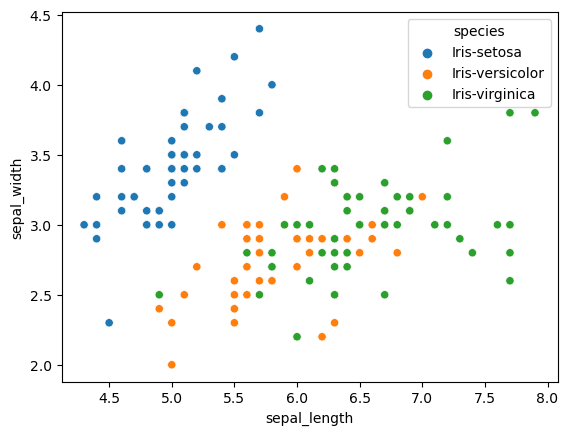

In [75]:
sns.scatterplot(data=df_iris_sepal, x="sepal_length", y="sepal_width", hue="species")

# Fitting K-Means

In [76]:
from sklearn.cluster import KMeans

In [77]:
# Initialising
km = KMeans(n_clusters=3)

In [79]:
df_iris_sepal.columns

Index(['sepal_length', 'sepal_width', 'species', 'Color'], dtype='object')

In [81]:
df_modelling = df_iris_sepal[['sepal_length', 'sepal_width']]

In [85]:
# Fitting a model
km_model = km.fit(df_modelling)

In [86]:
df_modelling.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [84]:
km.predict(df_modelling)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [91]:
# Making predictions
y_km = km.predict(df_modelling)

In [92]:
# Let's see our predictions
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [93]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [89]:
km.cluster_centers_

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

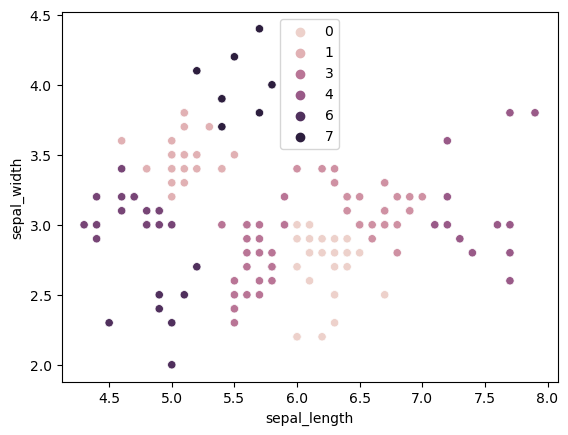

In [102]:
sns.scatterplot(x=df_iris_sepal["sepal_length"], y=df_iris_sepal["sepal_width"], hue= y_km)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

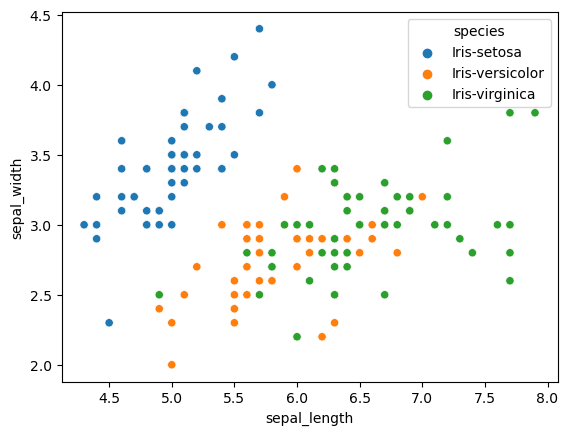

In [123]:
sns.scatterplot(data=df_iris_sepal, x="sepal_length", y="sepal_width", hue="species")

In [122]:
# Initialising
km = KMeans(n_clusters=4)

# Fitting a model
km_model = km.fit(df_modelling)

# Making predictions
y_km = km.predict(df_modelling)

# Let's see our predictions
y_km

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 2, 2, 2, 1, 2, 1, 2, 3, 2, 3, 3, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1], dtype=int32)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

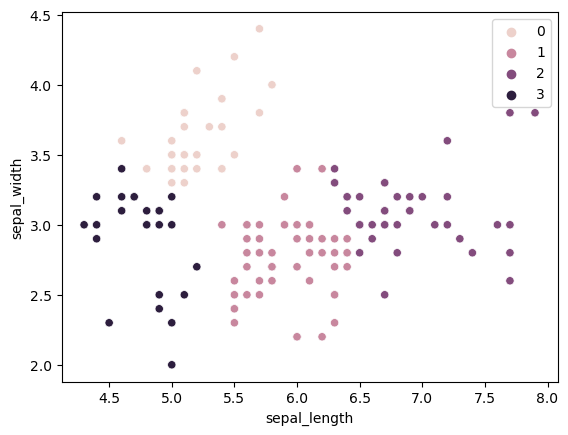

In [124]:
sns.scatterplot(x=df_iris_sepal["sepal_length"], y=df_iris_sepal["sepal_width"], hue= y_km)

### How to Choose the Right Number of Clusters in K-Means Clustering?
The maximum possible number of clusters will be equal to the number of observations in the dataset.

But then, how can we decide the optimum number of clusters? 
- One thing we can do is plot a graph, also known as an elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric. 
- Let’s say inertia for now.

### Inertia
What does inertia evaluates. 

- It tells us how far the points within a cluster are. 
- So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster. 
- Normally, we use Euclidean distance as the distance metric
- We calculate this for all the clusters. 
- The final inertial value is the sum of all these distances. 
- This distance within the clusters is known as intracluster distance. So, inertia gives us the sum of intracluster distances:

![](https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-08-08-15-32-17.png)

In [113]:
# Initialising
km = KMeans(n_clusters=10)

# Fitting a model
km_model = km.fit(df_modelling)

# Making predictions
y_km = km.predict(df_modelling)

# Let's see our predictions
y_km

array([1, 4, 4, 4, 1, 8, 4, 1, 4, 4, 8, 1, 4, 4, 8, 8, 8, 1, 8, 8, 1, 1,
       4, 1, 1, 4, 1, 1, 1, 4, 4, 1, 8, 8, 4, 1, 8, 4, 4, 1, 1, 9, 4, 1,
       8, 4, 8, 4, 8, 1, 2, 0, 2, 3, 6, 3, 0, 9, 2, 3, 9, 0, 6, 0, 3, 2,
       3, 3, 6, 3, 0, 6, 6, 6, 0, 2, 2, 2, 0, 3, 3, 3, 3, 6, 3, 0, 2, 6,
       3, 3, 3, 0, 3, 9, 3, 3, 3, 0, 9, 3, 0, 3, 5, 0, 2, 5, 9, 5, 6, 7,
       2, 6, 2, 3, 3, 0, 2, 7, 5, 6, 2, 3, 5, 6, 2, 5, 6, 0, 6, 5, 5, 7,
       6, 6, 6, 5, 0, 0, 0, 2, 2, 2, 3, 2, 2, 2, 6, 2, 0, 0], dtype=int32)

In [114]:
km_model.inertia_

9.626185656448817

### Let's check values of intertia for different numbers of cluster

In [118]:
import matplotlib.pyplot as plt
temp = []
for i in range(9):    
    # Initialising
    km = KMeans(n_clusters=i+1)

    # Fitting a model
    km_model = km.fit(df_modelling)

    output = km_model.inertia_
    
    temp.append(output)    

In [121]:
temp

[130.18093333333334,
 57.982406042078765,
 37.12370212765957,
 27.982542817358613,
 20.97661980044561,
 17.33916354682899,
 14.681790143190145,
 12.754228243021348,
 11.170064935064937]

# Elbow plot

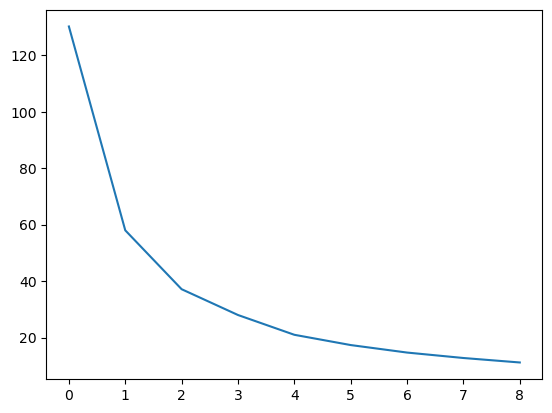

In [120]:
plt.plot(temp)

# Creating WordCloud

In [5]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [129]:
df.head()

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


# Cleaning our text

In [130]:
df.isna()

,Category,Text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
50420,False,False
50421,False,False
50422,False,False
50423,False,False


In [131]:
df.isna().sum()

Category    0
Text        1
dtype: int64

In [132]:
df['Text'].isna().index

RangeIndex(start=0, stop=50425, step=1)

In [133]:
df[df['Text'].isna()].index

Int64Index([39330], dtype='int64')

In [134]:
df.shape

(50425, 2)

In [135]:
df.drop(df[df['Text'].isna()].index)

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [136]:
df_clean = df.drop(df[df['Text'].isna()].index)

In [137]:
df_clean

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


# Converting to a blob of text

In [138]:
a = ['This is string1', 'this is string2', 'and so on']

In [140]:
str(a)

"['This is string1', 'this is string2', 'and so on']"

In [141]:
df_clean

,Category,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [144]:
df_clean['Text']

0        Paper Plane Design Framed Wall Hanging Motivat...
1        SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2        SAF 'UV Textured Modern Art Print Framed' Pain...
3        SAF Flower Print Framed Painting (Synthetic, 1...
4        Incredible Gifts India Wooden Happy Birthday U...
                               ...                        
50420    Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421    CrossBeats Wave Waterproof Bluetooth Wireless ...
50422    Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423    Samsung Guru FM Plus (SM-B110E/D, Black) Colou...
50424                     Micromax Canvas Win W121 (White)
Name: Text, Length: 50424, dtype: object

In [146]:
df_clean['Text'].values 

array(['Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for etern

In [154]:
type(df_clean['Text'].values)

numpy.ndarray

In [155]:
df_clean.shape

(50424, 2)

In [152]:
str(df_clean['Text'].values)

'[\'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal b

In [153]:
len(str(df_clean['Text'].values))

6697

In [12]:
text_array = df_clean['Text'].values 

NameError: name 'df_clean' is not defined

In [ ]:
text = str(text_array)

In [ ]:
text

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
stopwords

In [ ]:
WordCloud(background_color="white").generate(text)

In [ ]:
wordcloud = WordCloud(background_color="white").generate(text)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Harry Potter

In [1]:
# This is how you open and read a text file in python
with open('datasets/Harry_potter_the_Philosopher_Stone.txt', 'r') as file:
    harry_potter_text = file.read().replace('\n', '')


In [2]:
harry_potter_text

'/ THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t

In [3]:
len(harry_potter_text)

459169

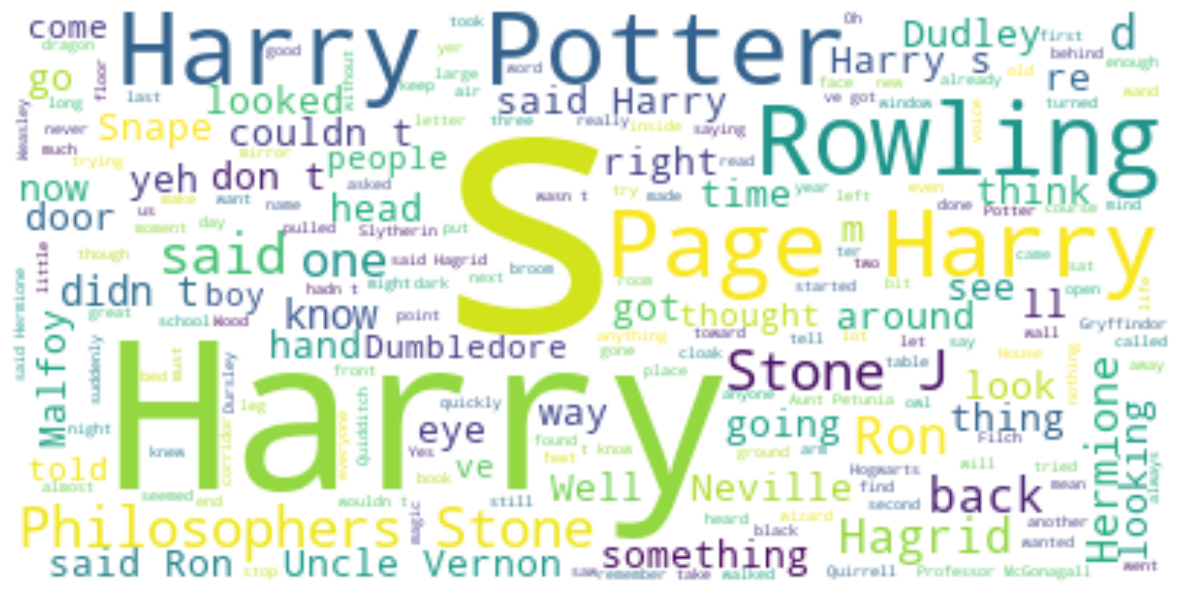

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(harry_potter_text))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()